In [1]:
library(arules)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [2]:
data()

Data sets in package ‘arules’:

Adult                   Adult Data Set
AdultUCI                Adult Data Set
Epub                    The Epub Transactions Data Set
Groceries               The Groceries Transactions Data Set
Income                  The Income Data Set
IncomeESL               The Income Data Set
Mushroom                The Mushroom Data Set as Transactions
SunBai                  The SunBai Weighted Transactions Data Set
Data sets in package ‘datasets’:

AirPassengers           Monthly Airline Passenger Numbers 1949-1960
BJsales                 Sales Data with Leading Indicator
BJsales.lead (BJsales)
                        Sales Data with Leading Indicator
BOD                     Biochemical Oxygen Demand
CO2                     Carbon Dioxide Uptake in Grass Plants
ChickWeight             Weight versus age of chicks on different diets
DNase                   Elisa assay of DNase
EuStockMarkets          Daily Closing Prices of Major European Stock
                     

In [7]:
data <- AdultUCI

In [13]:
dim(data)

[1] 48842    15

Procesamos los datos para que tenga sentido aplicar extracción de reglas

In [21]:
AdultUCI[["fnlwgt"]] = NULL
AdultUCI[["education-num"]] = NULL

In [22]:
 AdultUCI[[ "age"]] = ordered( cut ( AdultUCI[[ "age"]], c(15,25,45,65,100) ) ,
labels = c ("Young", "Middle-aged", "Senior", "Old"))
 AdultUCI[[ "hours-per-week"]] = ordered( cut ( AdultUCI[[ "hours-per-week"]], c(0,25,40,60,168) ) ,
labels = c("Part-time", "Full-time", "Over-time", "Workaholic"))
 AdultUCI[[ "capital-gain"]] = ordered( cut ( AdultUCI[[ "capital-gain"]], c(-Inf,0,median(AdultUCI[[
"capital-gain"]][AdultUCI[[ "capital-gain"]]>0]), Inf) ) , labels = c("None", "Low", "High"))
 AdultUCI[[ "capital-loss"]] = ordered( cut ( AdultUCI[[ "capital-loss"]], c(-Inf,0, median(AdultUCI[[
"capital-loss"]][AdultUCI[[ "capital-loss"]]>0]), Inf) ) , labels = c("None", "Low", "High"))

ERROR: Error in cut.default(AdultUCI[["age"]], c(15, 25, 45, 65, 100)): 'x' must be numeric


In [23]:
dim(AdultUCI)

[1] 48842    13

In [24]:
Adult <- as(AdultUCI,"transactions")
Adult

transactions in sparse format with
 48842 transactions (rows) and
 115 items (columns)

In [25]:
summary(Adult)

transactions as itemMatrix in sparse format with
 48842 rows (elements/itemsets/transactions) and
 115 columns (items) and a density of 0.1089939 

most frequent items:
           capital-loss=None            capital-gain=None 
                       46560                        44807 
native-country=United-States                   race=White 
                       43832                        41762 
           workclass=Private                      (Other) 
                       33906                       401333 

element (itemset/transaction) length distribution:
sizes
    9    10    11    12    13 
   19   971  2067 15623 30162 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.00   12.00   13.00   12.53   13.00   13.00 

includes extended item information - examples:
           labels variables      levels
1       age=Young       age       Young
2 age=Middle-aged       age Middle-aged
3      age=Senior       age      Senior

includes extended transaction information - examp

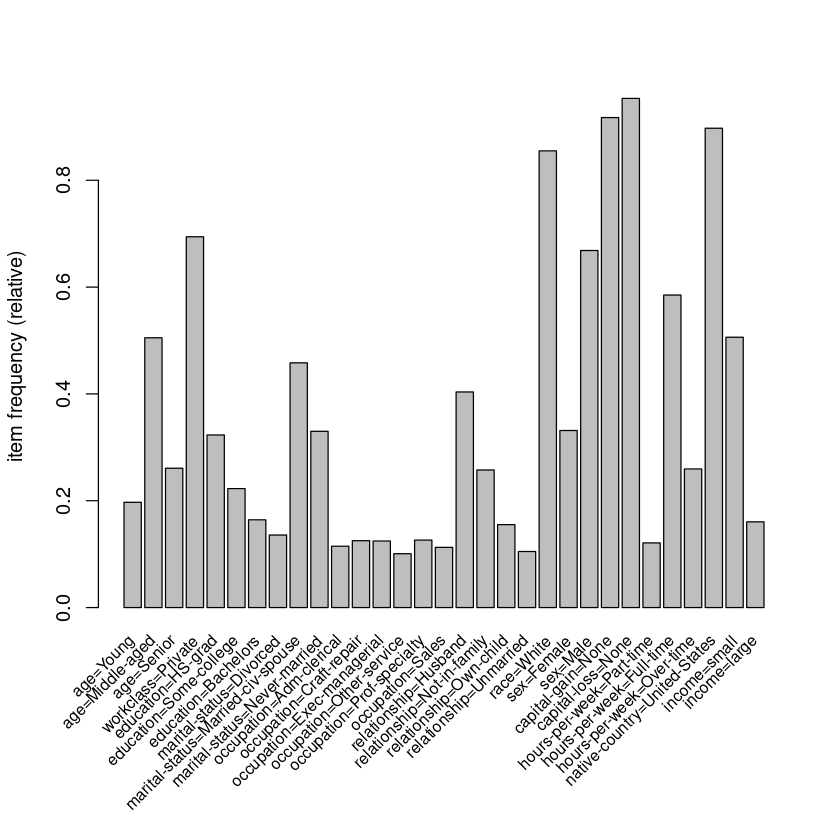

In [26]:
itemFrequencyPlot(Adult,support=0.1,cex.names=0.8)

In [30]:
 iAdult <- apriori(Adult, parameter = list(support = 0.1, target="frequent"))
  iAdult <- sort(iAdult, by="support") # Los ordenamos por el valor del soporte
  inspect(head(iAdult, n=10)) # Inspeccionamos los 10 primeros

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen            target  ext
     10 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 4884 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[115 item(s), 48842 transaction(s)] done [0.04s].
sorting and recoding items ... [31 item(s)] done [0.01s].
creating transaction tree ... done [0.02s].
checking subsets of size 1 2 3 4 5 6 7 8 9 done [0.09s].
sorting transactions ... done [0.01s].
writing ... [2616 set(s)] done [0.00s].
creating S4 object  ... done [0.01s].
     items                                             support   count
[1]  {capital-loss=None}                               0.9532779 46560
[2]  {capital-gain=None}                               0.9173867 44807

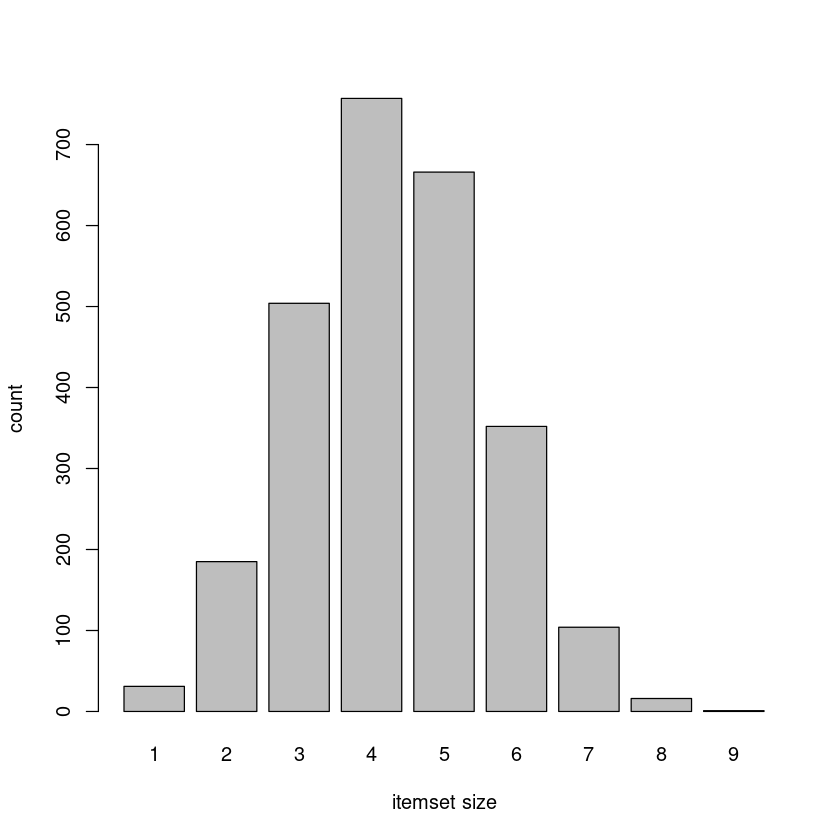

In [28]:
barplot(table(size(iAdult)), xlab="itemset size", ylab="count")

In [33]:
imaxAdult <- iAdult[is.maximal(iAdult)]
inspect(head(sort(imaxAdult, by="support")))

    items                                  support count
[1] {workclass=Private,                                 
     race=White,                                        
     sex=Male,                                          
     capital-gain=None,                                 
     capital-loss=None,                                 
     hours-per-week=Full-time,                          
     native-country=United-States}       0.1774293  8666
[2] {workclass=Private,                                 
     race=White,                                        
     capital-gain=None,                                 
     capital-loss=None,                                 
     hours-per-week=Full-time,                          
     native-country=United-States,                      
     income=small}                       0.1578150  7708
[3] {workclass=Private,                                 
     race=White,                                        
     sex=Male,                 

In [34]:
icloAdult <- iAdult[is.closed(iAdult)]
inspect(head(sort(icloAdult, by="support")))

    items                                             support   count
[1] {capital-loss=None}                               0.9532779 46560
[2] {capital-gain=None}                               0.9173867 44807
[3] {native-country=United-States}                    0.8974243 43832
[4] {capital-gain=None, capital-loss=None}            0.8706646 42525
[5] {race=White}                                      0.8550428 41762
[6] {capital-loss=None, native-country=United-States} 0.8548380 41752


In [35]:
rules <- apriori(Adult, parameter = list(support = 0.1, confidence = 0.8, minlen = 2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 4884 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[115 item(s), 48842 transaction(s)] done [0.03s].
sorting and recoding items ... [31 item(s)] done [0.01s].
creating transaction tree ... done [0.03s].
checking subsets of size 1 2 3 4 5 6 7 8 9 done [0.09s].
writing ... [6133 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].


In [37]:
summary(rules)

set of 6133 rules

rule length distribution (lhs + rhs):sizes
   2    3    4    5    6    7    8    9 
 121  637 1510 1903 1345  511   99    7 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   4.000   5.000   4.926   6.000   9.000 

summary of quality measures:
    support         confidence        coverage           lift       
 Min.   :0.1000   Min.   :0.8004   Min.   :0.1004   Min.   :0.9169  
 1st Qu.:0.1158   1st Qu.:0.8895   1st Qu.:0.1255   1st Qu.:0.9911  
 Median :0.1353   Median :0.9241   Median :0.1472   Median :1.0197  
 Mean   :0.1700   Mean   :0.9236   Mean   :0.1847   Mean   :1.2044  
 3rd Qu.:0.1890   3rd Qu.:0.9587   3rd Qu.:0.2074   3rd Qu.:1.0783  
 Max.   :0.8707   Max.   :1.0000   Max.   :0.9533   Max.   :2.9421  
     count      
 Min.   : 4885  
 1st Qu.: 5657  
 Median : 6606  
 Mean   : 8302  
 3rd Qu.: 9230  
 Max.   :42525  

mining info:
  data ntransactions support confidence
 Adult         48842     0.1        0.8
                               

In [42]:
rulesRaceWhite <- subset(rules, subset = lhs %in% "race=White" & lift > 1.2)
inspect(head(rulesRaceWhite))

    lhs                           rhs                                   support confidence  coverage     lift count
[1] {occupation=Craft-repair,                                                                                      
     race=White}               => {sex=Male}                          0.1076532  0.9553052 0.1126899 1.429066  5258
[2] {relationship=Own-child,                                                                                       
     race=White}               => {marital-status=Never-married}      0.1168257  0.8959020 0.1304001 2.714999  5706
[3] {race=White,                                                                                                   
     income=large}             => {marital-status=Married-civ-spouse} 0.1249949  0.8578053 0.1457148 1.872154  6105
[4] {race=White,                                                                                                   
     income=large}             => {sex=Male}                          0.

In [36]:
rulesSorted = sort(rules, by = "confidence")
inspect(head(rulesSorted))

    lhs                                     rhs          support confidence  coverage     lift count
[1] {relationship=Husband,                                                                          
     income=large}                       => {sex=Male} 0.1211662          1 0.1211662 1.495926  5918
[2] {relationship=Husband,                                                                          
     hours-per-week=Over-time}           => {sex=Male} 0.1472298          1 0.1472298 1.495926  7191
[3] {age=Senior,                                                                                    
     relationship=Husband}               => {sex=Male} 0.1479874          1 0.1479874 1.495926  7228
[4] {marital-status=Married-civ-spouse,                                                             
     relationship=Husband,                                                                          
     income=large}                       => {sex=Male} 0.1210843          1 0.1210843 1.495

In [38]:
inspect(head(rules))

    lhs                          rhs                              support confidence  coverage      lift count
[1] {relationship=Unmarried}  => {capital-loss=None}            0.1019819  0.9719024 0.1049302 1.0195373  4981
[2] {occupation=Sales}        => {race=White}                   0.1005282  0.8920785 0.1126899 1.0433144  4910
[3] {occupation=Sales}        => {native-country=United-States} 0.1039679  0.9226017 0.1126899 1.0280552  5078
[4] {occupation=Sales}        => {capital-gain=None}            0.1030670  0.9146076 0.1126899 0.9969706  5034
[5] {occupation=Sales}        => {capital-loss=None}            0.1068343  0.9480378 0.1126899 0.9945030  5218
[6] {occupation=Adm-clerical} => {native-country=United-States} 0.1052373  0.9160577 0.1148806 1.0207632  5140


In [39]:
 rulesSorted = sort(rules, by = "confidence")